In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6832\2379311718.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


100 epochs elapsed
Current accuracy is : 0.9836456109008862
Do you want to stop (y/*)??y


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6832\2379311718.py:91: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  h.show()


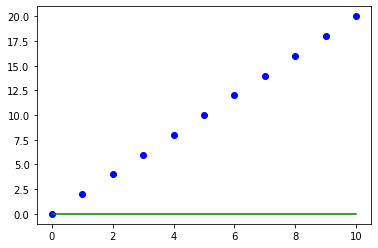

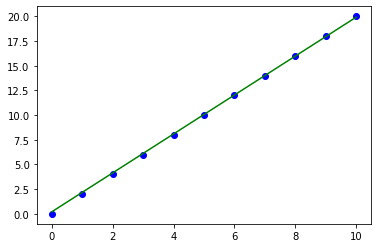

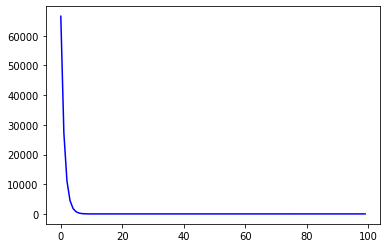

In [2]:
# Implementation of gradient descent in linear regression
import numpy as np
import matplotlib.pyplot as plt

class Linear_Regression:
	def __init__(self, X, Y):
		self.X = X
		self.Y = Y
		self.b = [0, 0]
	
	def update_coeffs(self, learning_rate):
		Y_pred = self.predict()
		Y = self.Y
		m = len(Y)
		self.b[0] = self.b[0] - (learning_rate * ((1/m) *
								np.sum(Y_pred - Y)))

		self.b[1] = self.b[1] - (learning_rate * ((1/m) *
								np.sum((Y_pred - Y) * self.X)))

	def predict(self, X=[]):
		Y_pred = np.array([])
		if not X: X = self.X
		b = self.b
		for x in X:
			Y_pred = np.append(Y_pred, b[0] + (b[1] * x))

		return Y_pred
	
	def get_current_accuracy(self, Y_pred):
		p, e = Y_pred, self.Y
		n = len(Y_pred)
		return 1-sum(
			[
				abs(p[i]-e[i])/e[i]
				for i in range(n)
				if e[i] != 0]
		)/n
	#def predict(self, b, yi):

	def compute_cost(self, Y_pred):
		m = len(self.Y)
		J = (1 / 2*m) * (np.sum(Y_pred - self.Y)**2)
		return J

	def plot_best_fit(self, Y_pred, fig):
				f = plt.figure(fig)
				plt.scatter(self.X, self.Y, color='b')
				plt.plot(self.X, Y_pred, color='g')
				f.show()


def main():
	X = np.array([i for i in range(11)])
	Y = np.array([2*i for i in range(11)])

	regressor = Linear_Regression(X, Y)

	iterations = 0
	steps = 100
	learning_rate = 0.01
	costs = []
	
	#original best-fit line
	Y_pred = regressor.predict()
	regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line')
	

	while 1:
		Y_pred = regressor.predict()
		cost = regressor.compute_cost(Y_pred)
		costs.append(cost)
		regressor.update_coeffs(learning_rate)
		
		iterations += 1
		if iterations % steps == 0:
			print(iterations, "epochs elapsed")
			print("Current accuracy is :",
				regressor.get_current_accuracy(Y_pred))

			stop = input("Do you want to stop (y/*)??")
			if stop == "y":
				break

	#final best-fit line
	regressor.plot_best_fit(Y_pred, 'Final Best Fit Line')

	#plot to verify cost function decreases
	h = plt.figure('Verification')
	plt.plot(range(iterations), costs, color='b')
	h.show()

	# if user wants to predict using the regressor:
	regressor.predict([i for i in range(10)])

if __name__ == '__main__':
	main()


Estimated coefficients:
b_0 = 1.2363636363636363 		
b_1 = 1.1696969696969697


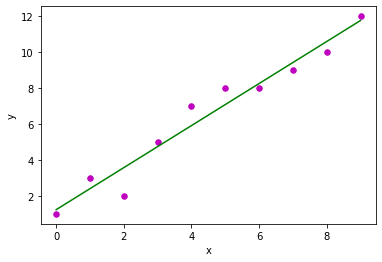

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
	# number of observations/points
	n = np.size(x)

	# mean of x and y vector
	m_x = np.mean(x)
	m_y = np.mean(y)

	# calculating cross-deviation and deviation about x
	SS_xy = np.sum(y*x) - n*m_y*m_x
	SS_xx = np.sum(x*x) - n*m_x*m_x

	# calculating regression coefficients
	b_1 = SS_xy / SS_xx
	b_0 = m_y - b_1*m_x

	return (b_0, b_1)

def plot_regression_line(x, y, b):
	# plotting the actual points as scatter plot
	plt.scatter(x, y, color = "m",
			marker = "o", s = 30)

	# predicted response vector
	y_pred = b[0] + b[1]*x

	# plotting the regression line
	plt.plot(x, y_pred, color = "g")

	# putting labels
	plt.xlabel('x')
	plt.ylabel('y')

	# function to show plot
	plt.show()

def main():
	# observations / data
	x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
	y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

	# estimating coefficients
	b = estimate_coef(x, y)
	print("Estimated coefficients:\nb_0 = {} \
		\nb_1 = {}".format(b[0], b[1]))

	# plotting regression line
	plot_regression_line(x, y, b)

if __name__ == "__main__":
	main()


Coefficients:  [-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
 -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
  2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
 -5.04008320e-01]
Variance score: 0.7209056672661754


C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

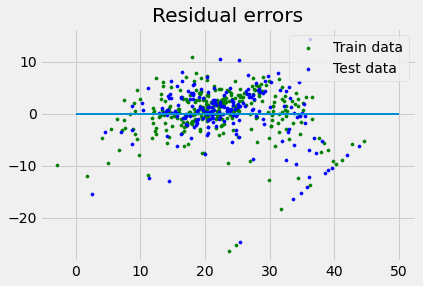

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

# load the boston dataset
boston = datasets.load_boston(return_X_y=False)

# defining feature matrix(X) and response vector(y)
X = boston.data
y = boston.target

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
													random_state=1)

# create linear regression object
reg = linear_model.LinearRegression()

# train the model using the training sets
reg.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

# plot for residual error

## setting plot style
plt.style.use('fivethirtyeight')

## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
			color = "green", s = 10, label = 'Train data')

## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
			color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

## plotting legend
plt.legend(loc = 'upper right')

## plot title
plt.title("Residual errors")

## method call for showing the plot
plt.show()


Estimated coefficients:
b_0 = 1.2363636363636363 		
b_1 = 1.1696969696969697


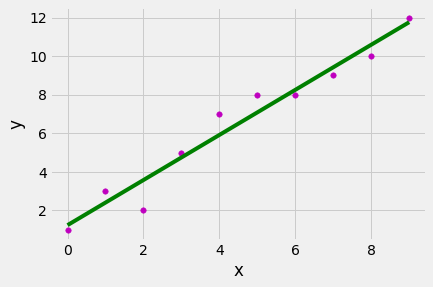

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
	# number of observations/points
	n = np.size(x)

	# mean of x and y vector
	m_x = np.mean(x)
	m_y = np.mean(y)

	# calculating cross-deviation and deviation about x
	SS_xy = np.sum(y*x) - n*m_y*m_x
	SS_xx = np.sum(x*x) - n*m_x*m_x

	# calculating regression coefficients
	b_1 = SS_xy / SS_xx
	b_0 = m_y - b_1*m_x

	return (b_0, b_1)

def plot_regression_line(x, y, b):
	# plotting the actual points as scatter plot
	plt.scatter(x, y, color = "m",
			marker = "o", s = 30)

	# predicted response vector
	y_pred = b[0] + b[1]*x

	# plotting the regression line
	plt.plot(x, y_pred, color = "g")

	# putting labels
	plt.xlabel('x')
	plt.ylabel('y')

	# function to show plot
	plt.show()

def main():
	# observations / data
	x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
	y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

	# estimating coefficients
	b = estimate_coef(x, y)
	print("Estimated coefficients:\nb_0 = {} \
		\nb_1 = {}".format(b[0], b[1]))

	# plotting regression line
	plot_regression_line(x, y, b)

if __name__ == "__main__":
	main()


Estimated coefficients:
b_0 = -0.3913613749434832 		
b_1 = 1.372682044323839


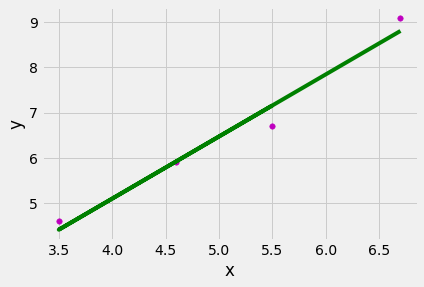

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
	# number of observations/points
	n = np.size(x)

	# mean of x and y vector
	m_x = np.mean(x)
	m_y = np.mean(y)

	# calculating cross-deviation and deviation about x
	SS_xy = np.sum(y*x) - n*m_y*m_x
	SS_xx = np.sum(x*x) - n*m_x*m_x

	# calculating regression coefficients
	b_1 = SS_xy / SS_xx
	b_0 = m_y - b_1*m_x

	return (b_0, b_1)

def plot_regression_line(x, y, b):
	# plotting the actual points as scatter plot
	plt.scatter(x, y, color = "m",
			marker = "o", s = 30)

	# predicted response vector
	y_pred = b[0] + b[1]*x

	# plotting the regression line
	plt.plot(x, y_pred, color = "g")

	# putting labels
	plt.xlabel('x')
	plt.ylabel('y')

	# function to show plot
	plt.show()

def main():
	# observations / data
	x = np.array([6.7, 4.6, 3.5 , 5.5])
	y = np.array([9.1, 5.9, 4.6 , 6.7])

	# estimating coefficients
	b = estimate_coef(x, y)
	print("Estimated coefficients:\nb_0 = {} \
		\nb_1 = {}".format(b[0], b[1]))

	# plotting regression line
	plot_regression_line(x, y, b)

if __name__ == "__main__":
	main()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6832\2379311718.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


100 epochs elapsed
Current accuracy is : 0.9836456109008862
Do you want to stop (y/*)??y


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6832\2379311718.py:91: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  h.show()


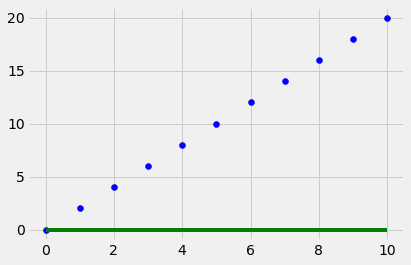

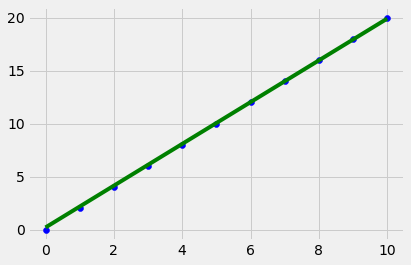

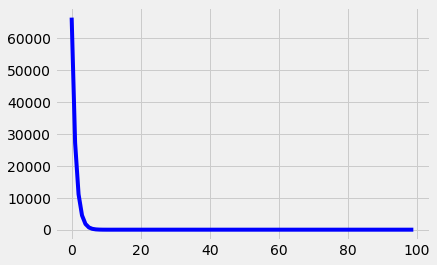

In [8]:
# Implementation of gradient descent in linear regression
import numpy as np
import matplotlib.pyplot as plt

class Linear_Regression:
	def __init__(self, X, Y):
		self.X = X
		self.Y = Y
		self.b = [0, 0]
	
	def update_coeffs(self, learning_rate):
		Y_pred = self.predict()
		Y = self.Y
		m = len(Y)
		self.b[0] = self.b[0] - (learning_rate * ((1/m) *
								np.sum(Y_pred - Y)))

		self.b[1] = self.b[1] - (learning_rate * ((1/m) *
								np.sum((Y_pred - Y) * self.X)))

	def predict(self, X=[]):
		Y_pred = np.array([])
		if not X: X = self.X
		b = self.b
		for x in X:
			Y_pred = np.append(Y_pred, b[0] + (b[1] * x))

		return Y_pred
	
	def get_current_accuracy(self, Y_pred):
		p, e = Y_pred, self.Y
		n = len(Y_pred)
		return 1-sum(
			[
				abs(p[i]-e[i])/e[i]
				for i in range(n)
				if e[i] != 0]
		)/n
	#def predict(self, b, yi):

	def compute_cost(self, Y_pred):
		m = len(self.Y)
		J = (1 / 2*m) * (np.sum(Y_pred - self.Y)**2)
		return J

	def plot_best_fit(self, Y_pred, fig):
				f = plt.figure(fig)
				plt.scatter(self.X, self.Y, color='b')
				plt.plot(self.X, Y_pred, color='g')
				f.show()


def main():
	X = np.array([i for i in range(11)])
	Y = np.array([2*i for i in range(11)])

	regressor = Linear_Regression(X, Y)

	iterations = 0
	steps = 100
	learning_rate = 0.01
	costs = []
	
	#original best-fit line
	Y_pred = regressor.predict()
	regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line')
	

	while 1:
		Y_pred = regressor.predict()
		cost = regressor.compute_cost(Y_pred)
		costs.append(cost)
		regressor.update_coeffs(learning_rate)
		
		iterations += 1
		if iterations % steps == 0:
			print(iterations, "epochs elapsed")
			print("Current accuracy is :",
				regressor.get_current_accuracy(Y_pred))

			stop = input("Do you want to stop (y/*)??")
			if stop == "y":
				break

	#final best-fit line
	regressor.plot_best_fit(Y_pred, 'Final Best Fit Line')

	#plot to verify cost function decreases
	h = plt.figure('Verification')
	plt.plot(range(iterations), costs, color='b')
	h.show()

	# if user wants to predict using the regressor:
	regressor.predict([i for i in range(10)])

if __name__ == '__main__':
	main()


Estimated regression coefficients: [[  1.70474504  15.04062212 -20.47216021]]
No. of iterations: 2612
Correctly predicted labels: 100


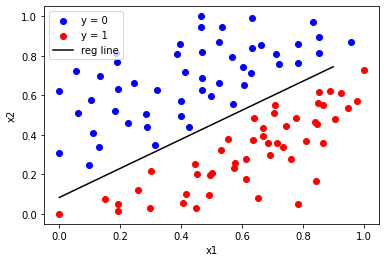

In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt


def loadCSV(filename):
	'''
	function to load dataset
	'''
	with open(filename,"r") as csvfile:
		lines = csv.reader(csvfile)
		dataset = list(lines)
		for i in range(len(dataset)):
			dataset[i] = [float(x) for x in dataset[i]]	
	return np.array(dataset)


def normalize(X):
	'''
	function to normalize feature matrix, X
	'''
	mins = np.min(X, axis = 0)
	maxs = np.max(X, axis = 0)
	rng = maxs - mins
	norm_X = 1 - ((maxs - X)/rng)
	return norm_X


def logistic_func(beta, X):
	'''
	logistic(sigmoid) function
	'''
	return 1.0/(1 + np.exp(-np.dot(X, beta.T)))


def log_gradient(beta, X, y):
	'''
	logistic gradient function
	'''
	first_calc = logistic_func(beta, X) - y.reshape(X.shape[0], -1)
	final_calc = np.dot(first_calc.T, X)
	return final_calc


def cost_func(beta, X, y):
	'''
	cost function, J
	'''
	log_func_v = logistic_func(beta, X)
	y = np.squeeze(y)
	step1 = y * np.log(log_func_v)
	step2 = (1 - y) * np.log(1 - log_func_v)
	final = -step1 - step2
	return np.mean(final)


def grad_desc(X, y, beta, lr=.01, converge_change=.001):
	'''
	gradient descent function
	'''
	cost = cost_func(beta, X, y)
	change_cost = 1
	num_iter = 1
	
	while(change_cost > converge_change):
		old_cost = cost
		beta = beta - (lr * log_gradient(beta, X, y))
		cost = cost_func(beta, X, y)
		change_cost = old_cost - cost
		num_iter += 1
	
	return beta, num_iter


def pred_values(beta, X):
	'''
	function to predict labels
	'''
	pred_prob = logistic_func(beta, X)
	pred_value = np.where(pred_prob >= .5, 1, 0)
	return np.squeeze(pred_value)


def plot_reg(X, y, beta):
	'''
	function to plot decision boundary
	'''
	# labelled observations
	x_0 = X[np.where(y == 0.0)]
	x_1 = X[np.where(y == 1.0)]
	
	# plotting points with diff color for diff label
	plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0')
	plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1')
	
	# plotting decision boundary
	x1 = np.arange(0, 1, 0.1)
	x2 = -(beta[0,0] + beta[0,1]*x1)/beta[0,2]
	plt.plot(x1, x2, c='k', label='reg line')

	plt.xlabel('x1')
	plt.ylabel('x2')
	plt.legend()
	plt.show()
	

	
if __name__ == "__main__":
	# load the dataset
	dataset = loadCSV('dataset1.csv')
	
	# normalizing feature matrix
	X = normalize(dataset[:, :-1])
	
	# stacking columns with all ones in feature matrix
	X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X))

	# response vector
	y = dataset[:, -1]

	# initial beta values
	beta = np.matrix(np.zeros(X.shape[1]))

	# beta values after running gradient descent
	beta, num_iter = grad_desc(X, y, beta)

	# estimated beta values and number of iterations
	print("Estimated regression coefficients:", beta)
	print("No. of iterations:", num_iter)

	# predicted labels
	y_pred = pred_values(beta, X)
	
	# number of correctly predicted labels
	print("Correctly predicted labels:", np.sum(y == y_pred))
	
	# plotting regression line
	plot_reg(X, y, beta)


In [4]:
from sklearn import datasets, linear_model, metrics

# load the digit dataset
digits = datasets.load_digits()

# defining feature matrix(X) and response vector(y)
X = digits.data
y = digits.target

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
													random_state=1)

# create logistic regression object
reg = linear_model.LogisticRegression()

# train the model using the training sets
reg.fit(X_train, y_train)

# making predictions on the testing set
y_pred = reg.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
print("Logistic Regression model accuracy(in %):",
metrics.accuracy_score(y_test, y_pred)*100)


Logistic Regression model accuracy(in %): 96.52294853963839


C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(2)

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# extended data 
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

In [6]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]    
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:                
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w
eta = .05 
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])

[[-4.092695  ]
 [ 1.55277242]]


In [7]:
print(sigmoid(np.dot(w[-1].T, X)))

[[0.03501592 0.05078108 0.07310642 0.10416972 0.14634799 0.20175793
  0.20175793 0.27147534 0.35458234 0.4475032  0.54424128 0.63775242
  0.72188183 0.79282004 0.89267823 0.92460236 0.94758783 0.96384008
  0.97518471 0.9884283 ]]


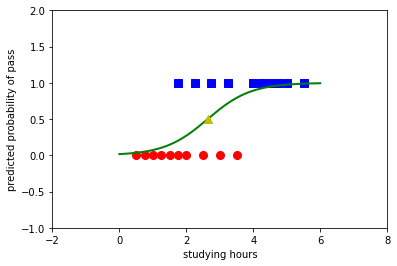

In [8]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()

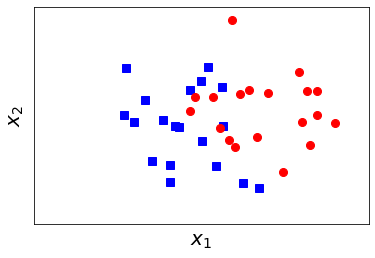

In [9]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
# list of points 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.savefig('logistic_2d.png', bbox_inches='tight', dpi = 300)
plt.show()

In [10]:
print(X0.shape)

(20, 2)


In [11]:
X = np.concatenate((X0, X1), axis = 0).T
y = np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis = 1).T
# Xbar 
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

eta = .05 
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count= 10000)
print(w[-1])

[[-9.51043127]
 [ 2.25978315]
 [ 1.42588178]]


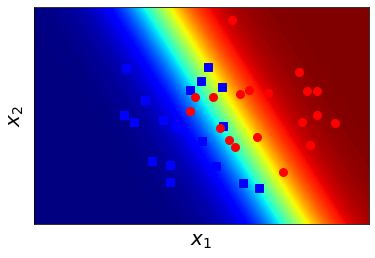

In [12]:
# Make data.
xm = np.arange(-1, 6, 0.025)
xlen = len(xm)
ym = np.arange(0, 4, 0.025)
ylen = len(ym)
xm, ym = np.meshgrid(xm, ym)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
w2 = w[-1][2][0]
zm = sigmoid(w0 + w1*xm + w2*ym)

CS = plt.contourf(xm, ym, zm, 200, cmap='jet')

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.savefig('logistic_2d_2.png', bbox_inches='tight', dpi = 300)
plt.show()